In [1]:
import time
import pathlib

import numpy as np
import matplotlib.pyplot as plt

import hvsrpy
from hvsrpy import plot_tools

plt.style.use("./data/hvsrpy.mplstyle")

## Input Data

In [2]:
# Input file name (may be a relative or full path).
# fnames = [["./data/UT.STN11.A2_C50.miniseed"]]
fnames = [["./data/UT.STN11.A2_C150.miniseed"]]
# fnames = [["./data/UT.STN11.A2_C300.miniseed"]]

print(f"Number of recordings: {len(fnames)}")
for fname_set in fnames:
    for file in fname_set:
        if not pathlib.Path(file).exists():
            raise FileNotFoundError(f"file {file} not found; check spelling.")
print("All files exists.")

Number of recordings: 1
All files exists.


## Preprocessing Settings

In [3]:
preprocessing_settings = hvsrpy.settings.HvsrPreProcessingSettings()
preprocessing_settings.detrend = "linear"
preprocessing_settings.window_length_in_seconds = 30
preprocessing_settings.orient_to_degrees_from_north = 0.0
preprocessing_settings.filter_corner_frequencies_in_hz = (None, None)
preprocessing_settings.ignore_dissimilar_time_step_warning = False

print("Preprocessing Summary")
print("-"*60)
preprocessing_settings.psummary()

Preprocessing Summary
------------------------------------------------------------
hvsrpy_version                           : 2.0.0rc7
orient_to_degrees_from_north             : 0.0
filter_corner_frequencies_in_hz          : (None, None)
window_length_in_seconds                 : 30
detrend                                  : linear
preprocessing_method                     : hvsr


## Processing Settings

In [4]:
processing_settings = hvsrpy.settings.HvsrTraditionalProcessingSettings()
processing_settings.window_type_and_width = ("tukey", 0.2)
processing_settings.smoothing=dict(operator="konno_and_ohmachi",
                                   bandwidth=40,
                                   center_frequencies_in_hz=np.geomspace(0.2, 50, 200))
processing_settings.method_to_combine_horizontals = "geometric_mean"
processing_settings.handle_dissimilar_time_steps_by = "frequency_domain_resampling"

print("Processing Summary")
print("-"*60)
processing_settings.psummary()

Processing Summary
------------------------------------------------------------
hvsrpy_version                           : 2.0.0rc7
window_type_and_width                    : ('tukey', 0.2)
smoothing                                :
     operator                            : konno_and_ohmachi
     bandwidth                           : 40
     center_frequencies_in_hz            : [0.2, 0.205626908165 ... 1767550226364, 50.0]
fft_settings                             : None
handle_dissimilar_time_steps_by          : frequency_domain_resampling
processing_method                        : traditional
method_to_combine_horizontals            : geometric_mean


## Calculate HVSR

In [5]:
srecords = hvsrpy.read(fnames)
srecords_preprocessed = hvsrpy.preprocess(srecords, preprocessing_settings)
hvsr = hvsrpy.process(srecords_preprocessed, processing_settings)

## Apply Window Rejection Algorith

In [6]:
# Cox et al. (2020) | Frequency-Domain Window Rejection Algorithm
n = 2
search_range_in_hz = (None, None)
_ = hvsrpy.frequency_domain_window_rejection(hvsr, n=n, search_range_in_hz=search_range_in_hz)

## Plot Result

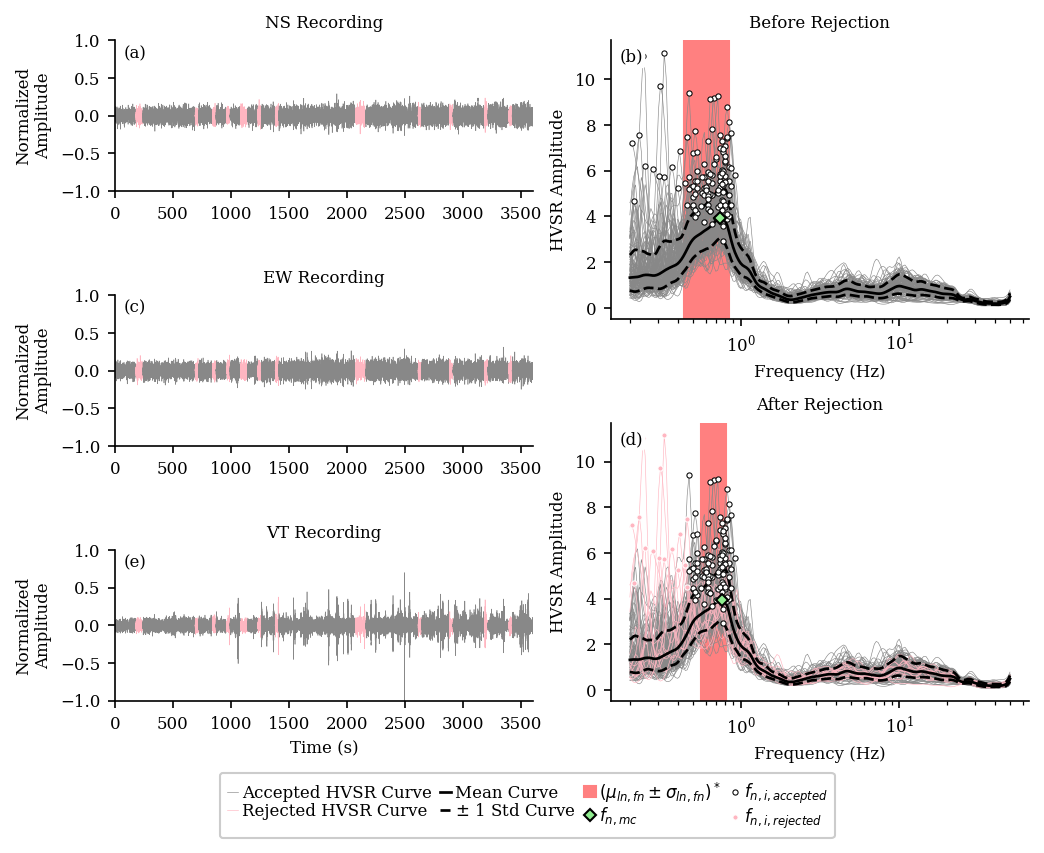

In [7]:
fig, axs = hvsrpy.plot_tools.plot_pre_and_post_rejection(srecords_preprocessed, hvsr)
plt.show()

## Results

In [9]:
# print(hvsr.mean_fn_frequency(distribution=distribution_fn))
# print(hvsr.std_fn_frequency(distribution=distribution_fn))
# print(hvsr.mean_curve_peak(distribution=distribution_mc))

In [ ]:
# reliability = utils.sesame_reliability(hv.meta["Window Length"], len(hv.valid_window_indices), hv.frq, hv.mean_curve(), hv.std_curve(), search_limits=(peak_f_lower, peak_f_upper), verbose=1)
# clarity = utils.sesame_clarity(hv.frq, hv.mean_curve(), hv.std_curve(), hv.std_f0_frq(distribution="normal"), search_limits=(peak_f_lower, peak_f_upper), verbose=1)